<a href="https://colab.research.google.com/github/Tclack88/Lambda/blob/master/precourse/LSDS_Intro_Day_6_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra Applications Assignment





### Your data:

**chirps_per_sec** = chirps/sec for the striped ground cricket

**temperature** = temperature in degrees Fahrenheit

Reference: The Song of Insects by Dr.G.W. Pierce, Harvard College Press

In [0]:
#!pip install xlrd
import pandas as pd
import numpy as np

df = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr02.xls')
df = df.rename(columns={'X':'chirps_per_sec', 'Y':'temperature'})

print(df.shape)
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'
(15, 2)


,chirps_per_sec,temperature
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


## 1) Graph a scatterplot of chirps_per_sec vs temperature 

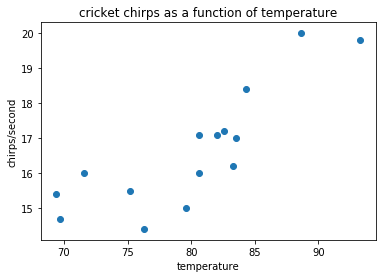

In [0]:
import matplotlib.pyplot as plt
plt.scatter(df.temperature,df.chirps_per_sec)
plt.title("cricket chirps as a function of temperature")
plt.xlabel("temperature")
plt.ylabel("chirps/second")
plt.show()

## 2) Follow the steps below to compute the coefficients (intercept and slope) for the line of best fit:

## 2.1) Use np.ones to add a column of ones to the dataframe

In [0]:
df['ones'] = np.ones(df.shape[0])

## 2.2) Create your X matrix from the 'ones' and 'temperature' columns

In [0]:
X = df[['temperature','ones']].values

[[88.59999847  1.        ]
 [71.59999847  1.        ]
 [93.30000305  1.        ]
 [84.30000305  1.        ]
 [80.59999847  1.        ]
 [75.19999695  1.        ]
 [69.69999695  1.        ]
 [82.          1.        ]
 [69.40000153  1.        ]
 [83.30000305  1.        ]
 [79.59999847  1.        ]
 [82.59999847  1.        ]
 [80.59999847  1.        ]
 [83.5         1.        ]
 [76.30000305  1.        ]]


## 2.3) Create your Y vector from the chips_per_sec column. (Make sure that it is formatted as a column vector.)

In [0]:
y = df.chirps_per_sec.values.reshape(-1,1)
print(y)

[[20.        ]
 [16.        ]
 [19.79999924]
 [18.39999962]
 [17.10000038]
 [15.5       ]
 [14.69999981]
 [17.10000038]
 [15.39999962]
 [16.20000076]
 [15.        ]
 [17.20000076]
 [16.        ]
 [17.        ]
 [14.39999962]]


## 2.4) Calculate X_transpose and print the result: $X^{T}$ 

In [0]:
Xt  = np.transpose(X)

[[88.59999847 71.59999847 93.30000305 84.30000305 80.59999847 75.19999695
  69.69999695 82.         69.40000153 83.30000305 79.59999847 82.59999847
  80.59999847 83.5        76.30000305]
 [ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]]


## 2.5) Calculate X_transpose_X and print the result: $X^{T}X$

In [0]:
XtX = np.matmul(Xt,X)
print(XtX)

[[9.67258599e+04 1.20060000e+03]
 [1.20060000e+03 1.50000000e+01]]


## 2.6) Calculate the inverse of X_transpose_X and print the result: $(X^{T}X)^{-1}$ 

In [0]:
XtX_inv = np.linalg.inv(XtX)
print(XtX_inv)

[[ 1.58771451e-03 -1.27080669e-01]
 [-1.27080669e-01  1.02382034e+01]]


## 2.7) An aside: Multiply the X_tranpose_X matrix against its inverse: $(X^{T}X)(X^{T}X)^{-1}$  Print the result. What is the name for the resulting matrix?

In [0]:
aside_matrix = np.matmul(XtX,XtX_inv)
print(aside_matrix)
print("\nthis is the identity matrix, which is easy to tell with rounding:")
print(np.round(aside_matrix))

[[ 1.00000000e+00 -2.06112552e-12]
 [ 5.55111512e-17  1.00000000e+00]]

this is the identity matrix, which is easy to tell with rounding:
[[ 1. -0.]
 [ 0.  1.]]


## 2.8) Calculate X_transpose_Y and print the result: $X^{T}Y$

In [0]:
Xty = np.matmul(Xt,y)
print(Xty)

[[20127.47000262]
 [  249.80000019]]


## 2.9) Finally, calculate the Beta coefficients vector by multiplying the left and right halfs of the linear regression equation. Print the Beta vector: $\beta = (X^{T}X)^{-1} X^{T}Y$  
(You should have all of the parts to do this now)

In [0]:
beta = np.matmul(XtX_inv,Xty)
print(beta)

[[ 0.21192498]
 [-0.3091419 ]]


## 3) Graph the line of best fit through the scatterplot of the data points

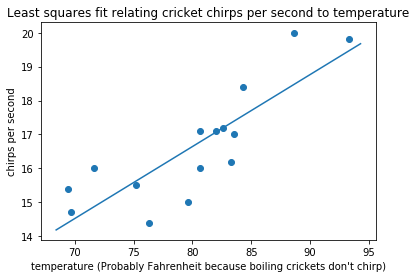

In [0]:
m = beta[0][0]
b = beta[1][0]
plt.scatter(df.temperature,df.chirps_per_sec)
xvals = np.linspace(min(df.temperature)-1,max(df.temperature)+1,10) #only plot the relevant values of x from min temp to max temp
plt.plot(xvals,m*xvals+b)
plt.title("Least squares fit relating cricket chirps per second to temperature")
plt.xlabel("temperature (Probably Fahrenheit because boiling crickets don't chirp)")
plt.ylabel("chirps per second")
plt.show()

## 4) If a cricket has chirped 19 times in a second what is the predicted temperature? Plot this prediction as well.

In [0]:
# chirps_per_second = m * temperature + b
# therefore temperature = (chips_per_second - b ) / m
sample_chirp_rate = 19
predicted_temp = (sample_chirp_rate - b) / m
print(" A cricket chirping 19 times per second means the temperature is about",round(predicted_temp),"F")

 A cricket chirping 19 times per second means the temperature is about 91.0 F


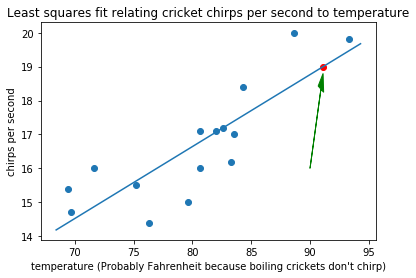

In [0]:
plt.scatter(df.temperature,df.chirps_per_sec)
xvals = np.linspace(min(df.temperature)-1,max(df.temperature)+1,10) #only plot the relevant values of x from min temp to max temp
plt.plot(xvals,m*xvals+b)
plt.title("Least squares fit relating cricket chirps per second to temperature")
plt.xlabel("temperature (Probably Fahrenheit because boiling crickets don't chirp)")
plt.ylabel("chirps per second")
plt.scatter(predicted_temp,sample_chirp_rate,color='r')
plt.arrow(90,16,predicted_temp-90,sample_chirp_rate-16.2,color='g',head_length = .5,head_width = .5,length_includes_head=True)
plt.show()

##Stretch Problem
Let's add a 3rd dimension. 

X1 = systolic blood pressure

X2 = age in years

X3 = weight in pounds

Compute the coefficients for the **plane** of best fit for

$X_1 = \beta_1X_2 + \beta_2X_3 + \beta_0$

Then graph the plane in addition to the  datapoints in a **3D** graph.
An article to get you started on [3D graphing](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

In [0]:
s_data = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls')
print(s_data.head())
s_data.shape

*** No CODEPAGE record, no encoding_override: will use 'ascii'
    X1  X2   X3
0  132  52  173
1  143  59  184
2  153  67  194
3  162  73  211
4  154  64  196


(11, 3)

In [0]:
s_data['ones'] = np.ones(s_data.shape[0])
X1 = s_data.X1.values
A = s_data[['X2','X3','ones']].values
# A is the matrix representing the 3 cols X2,X3,ones
# Our unknown coefficents we can call 'c'
# As written, the matrix in the statment can be reduced to
# X1 = Ac
# We wish to solve for c. We do this by operating on both sides with the transpose of A (we call At)
# then we can 'multiply though' by the inverse to isolate c
# (At)Ac = (At)X1
# (AtA)c = (At)X1
# (AtA_inv)(AtA)c = (AtA_inv)(At)X1
# c = (AtA_inv)(At)X1
At = np.transpose(A)
AtA = np.matmul(At,A)
AtA_inv = np.linalg.inv(AtA)
c = np.matmul(AtA_inv,(np.matmul(At,X1)))
print(c)

[ 0.86141469  0.3348592  30.99410295]


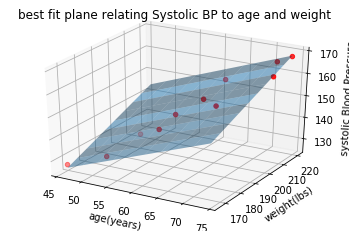

In [0]:
from mpl_toolkits.mplot3d import axes3d

def plane(x,y):
  # from ax + by + cz = d
  # z = (d - ax - by) / c
  z = (c[2] + c[0]*x + c[1]*y)
  return z

x_vals = np.linspace(min(s_data.X2),max(s_data.X2),10)
y_vals = np.linspace(min(s_data.X3),max(s_data.X3),10)
x_vals,y_vals = np.meshgrid(x_vals,y_vals)
z = plane(x_vals,y_vals)
#print(z)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(s_data.X2,s_data.X3,s_data.X1,color='r')
ax.plot_surface(x_vals,y_vals,z,alpha=.5)
plt.title("best fit plane relating Systolic BP to age and weight")
plt.xlabel("age(years)")
plt.ylabel("weight(lbs)")
ax.set_zlabel("systolic Blood Pressure")
plt.show()